# Aceleración de Punto Fijo

Sea el problema de punto fijo dado por:

$$x = g(x), \quad g: \mathbb{R}^n \to \mathbb{R}^n.$$

El método iterativo clásico de punto fijo genera la sucesión:

$$x_{k+1} = g(x_k), \quad k = 0, 1, 2, \dots$$

que, bajo condiciones adecuadas sobre la función $g$ (por ejemplo, que sea contractiva), converge al punto fijo $x^*$ tal que $x^* = g(x^*)$.

Sin embargo, la convergencia puede ser lenta.  
Para mejorarla, se introduce un esquema general de **aceleración de punto fijo**, que consiste en modificar la forma en que se actualiza la iteración, combinando información de pasos anteriores.  
En forma general, puede escribirse como:

$$x_{k+1} = \sum_{i=0}^{m_k} \beta_i^{(k)} \, g(x_{k - i}),$$

donde los coeficientes $\beta_i^{(k)}$ satisfacen:

$$\sum_{i=0}^{m_k} \beta_i^{(k)} = 1,
\quad \text{y} \quad m_k = \min(k, m),$$

siendo $m$ el número máximo de iteraciones pasadas consideradas.

El esquema anterior define una familia amplia de métodos de aceleración.  
Diferentes elecciones de los coeficientes $\beta_i^{(k)}$ conducen a métodos particulares:

- Si $\beta_0^{(k)} = 1$ y los demás son cero, se obtiene el método de punto fijo clásico.

- Si los coeficientes dependen de un parámetro fijo $\alpha$, se obtiene el método de **Halperin**.

- Si los coeficientes se determinan mediante una minimización del residuo, se obtiene el método de **Anderson**.

Por tanto, el método general de aceleración de punto fijo constituye un marco unificado que abarca diversas estrategias para acelerar la convergencia de la iteración $x_{k+1} = g(x_k)$.

Las aceleraciones de Halperin y Anderson son tipos específicos de aceleración de punto fijo. Ahora ahondaremos en la de Anderson:

## Anderson

El objetivo del método de aceleración de Anderson es mejorar la **convergencia del método de punto fijo**.  
Queremos resolver un problema del tipo:

$$x = g(x)$$

donde $g: \mathbb{R}^n \to \mathbb{R}^n $.

El **método de punto fijo clásico** genera una secuencia $x_{k+1} = g(x_k)$ que, bajo ciertas condiciones, converge al punto fijo $x^*$ que satisface $x^* = g(x^*)$.  
Sin embargo, esta convergencia puede ser muy lenta, especialmente cuando la función $g$ tiene derivadas cercanas a 1 en valor absoluto.

El **método de Anderson** busca acelerar la convergencia utilizando información de iteraciones pasadas.  
La idea central es aprovechar los residuos previos para predecir una mejor aproximación.

Primero, se define el residuo:

$$f_k = g(x_k) - x_k.$$

Luego, se almacenan los últimos $m$ residuos:

$$F_k = [\, f_{k-m_k}, \dots, f_k ],$$
donde $m_k = \min(k, m)$.

A continuación, se determinan los coeficientes $\alpha^{(k)} = (\alpha_0^{(k)}, \dots, \alpha_{m_k}^{(k)})$
que minimizan la norma del residuo combinado:

$$\min_{\alpha} \| F_k \alpha \|_2
\quad \text{sujeto a} \quad
\sum_{i=0}^{m_k} \alpha_i = 1.$$

Finalmente, se construye la nueva iteración como una combinación ponderada de las iteraciones pasadas:

$$x_{k+1} = \sum_{i=0}^{m_k} \alpha_i^{(k)} \, g(x_{k - m_k + i})$$

En palabras simples, el método de Anderson genera una nueva aproximación $x_{k+1}$
mezclando las evaluaciones anteriores de $g(x)$ para acelerar la convergencia.
Esto lo hace mucho más eficiente que la iteración de punto fijo estándar, especialmente en problemas no lineales.

## Ejemplo Práctico

Queremos resolver el siguiente problema:

$$x = \cos(x).$$

Para ello compararemos el Método de Punto Fijo con la Aceleración de Anderson.

### Método de Punto Fijo Clásico


In [2]:
import numpy as np

def g(x):
    return np.cos(x)

def fixed_point(x0, tol=1e-8, maxiter=100):
    x = x0
    for k in range(maxiter):
        x_next = g(x)
        if abs(x_next - x) < tol:
            return x_next, k+1
        x = x_next
    return x, maxiter

x, iters = fixed_point(1.0)
print(f"Punto fijo clásico: {x:.8f} en {iters} iteraciones")


Punto fijo clásico: 0.73908514 en 46 iteraciones


### Aceleración de Anderson


C:\Users\Manuel Sánchez\AppData\Local\Temp\ipykernel_31860\2143040165.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  gamma = -f_hist[-1] / F.sum()
C:\Users\Manuel Sánchez\AppData\Local\Temp\ipykernel_31860\2143040165.py:47: RuntimeWarning: invalid value encountered in double_scalars
  x = x_hist[-1] + gamma * X.sum()


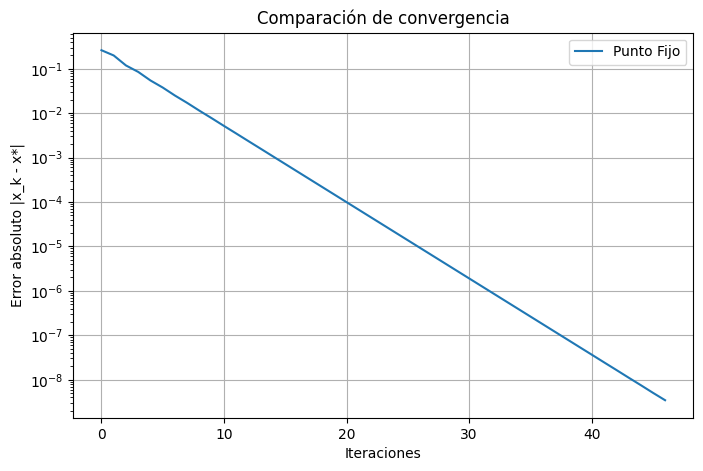

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Función del punto fijo
def g(x):
    return np.cos(x)

# Método de punto fijo clásico
def punto_fijo(x0, tol=1e-8, maxiter=100):
    x = x0
    iteraciones = [x]
    for _ in range(maxiter):
        x_next = g(x)
        iteraciones.append(x_next)
        if abs(x_next - x) < tol:
            break
        x = x_next
    return np.array(iteraciones)

# Método de Anderson
def anderson(x0, m=2, tol=1e-8, maxiter=100):
    x_hist = [x0]
    f_hist = [g(x0) - x0]
    x = x0

    for k in range(maxiter):
        f = g(x) - x
        if abs(f) < tol:
            break

        # Guardar historial
        x_hist.append(x)
        f_hist.append(f)

        # Limitar memoria a m pasos
        if len(f_hist) > m + 1:
            f_hist.pop(0)
            x_hist.pop(0)

        # Anderson solo si hay al menos 2 valores previos
        if len(f_hist) > 1:
            F = np.array(f_hist[1:]) - np.array(f_hist[:-1])
            X = np.array(x_hist[1:]) - np.array(x_hist[:-1])

            # Coeficiente gamma (minimización 1D)
            gamma = -f_hist[-1] / F.sum()
            x = x_hist[-1] + gamma * X.sum()
        else:
            x = g(x)

    return np.array(x_hist)

# Ejemplo de uso
x0 = 1.0
it_pf = punto_fijo(x0)
it_and = anderson(x0, m=2)

# Valor real
x_star = 0.7390851332

# Graficar comparación
plt.figure(figsize=(8,5))
plt.semilogy(np.abs(it_pf - x_star), label='Punto Fijo')
# plt.semilogy(np.abs(it_and - x_star), label='Anderson (m=2)')
plt.xlabel('Iteraciones')
plt.ylabel('Error absoluto |x_k - x*|')
plt.title('Comparación de convergencia')
plt.legend()
plt.grid(True)
plt.show()
